In [1]:
import pandas as pd
import requests
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
CLIENT_ID = 'HY2RYHQN2IHBJMBAKQRR1DDT2ONO0CEH0HQUHL1FIDEW0LWZ' # your Foursquare ID
CLIENT_SECRET = 'MN5R0SAJZVDX1COGGW3YVZZSUKQJ2QGGBKLHEYRG4H3U55UX' # your Foursquare Secret

#CLIENT_ID= '4PA5S4L3UPKDUNEWVF4SFSG54XZEMTVV4E4S4QME02GYU5BK'
#CLIENT_SECRET='OOADIYJXJDRI4RNWWOL0CVQ3U4LIYFX4ON2YZTWERV4HT5U5'
VERSION = '20180604'

In [3]:
def getallCategories():
    "This function outputs all the available categories in the foursquare API"
    
    results = requests.get('https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)).json()
    categories_json = results['response']['categories']
    categories = json_normalize(categories_json)
    categoryID = categories[['id','name']]
    return categoryID
    

In [4]:
ALLcategories = getallCategories()

In [5]:
print(ALLcategories)

                         id                         name
0  4d4b7104d754a06370d81259         Arts & Entertainment
1  4d4b7105d754a06372d81259         College & University
2  4d4b7105d754a06373d81259                        Event
3  4d4b7105d754a06374d81259                         Food
4  4d4b7105d754a06376d81259               Nightlife Spot
5  4d4b7105d754a06377d81259        Outdoors & Recreation
6  4d4b7105d754a06375d81259  Professional & Other Places
7  4e67e38e036454776db1fb3a                    Residence
8  4d4b7105d754a06378d81259               Shop & Service
9  4d4b7105d754a06379d81259           Travel & Transport


In [6]:
#Select the venue type you want to open
index=2
TargetVenueId = ALLcategories.id[index]


In [7]:
def AddressToCoordinates(address):
    "This function returns the geographical coordinates of the city being analised"
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return [latitude, longitude]

In [8]:
city_coordinates = AddressToCoordinates("Regent street,London, UK")
print(city_coordinates)

[51.5098533, -0.1364907]


In [9]:
LIMIT = 100
radius = 1000

In [10]:
# requesting the venues in the given address
results = requests.get('https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET,city_coordinates[0], city_coordinates[1], VERSION, radius, LIMIT,TargetVenueId)).json()
results

{'meta': {'code': 200, 'requestId': '5dcef7c871782e001b0eca22'},
 'response': {'venues': [{'id': '582599a0991e9b05db289efb',
    'name': 'Christmas in Leicester Square Festival',
    'location': {'lat': 51.510454224893024,
     'lng': -0.130256208278716,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.510454224893024,
       'lng': -0.130256208278716}],
     'distance': 437,
     'postalCode': 'WC2H 7DE',
     'cc': 'GB',
     'country': 'United Kingdom',
     'formattedAddress': ['WC2H 7DE', 'United Kingdom']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b3b',
      'name': 'Christmas Market',
      'pluralName': 'Christmas Markets',
      'shortName': 'Christmas Market',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_',
       'suffix': '.png'},
      'primary': True}],
    'hierarchy': [{'name': 'Leicester Square',
      'lang': 'en',
      'id': '4ac518d1f964a520c3a620e3',
      'canonicalUrl': 'https://foursquare.com/v/leicester-sq

In [11]:
# turns json into dataframe of the venues
venues_json = results['response']['venues']
venues = json_normalize(venues_json)

# to eliminate the venues lacking info
venues = venues[[True if len(venues.categories[i])!=0 else False for i in range(len(venues.categories))]]

venues.reset_index(drop = True, inplace = True)
venues

,id,name,categories,hierarchy,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.country,location.formattedAddress,location.city,location.state,location.address
0,582599a0991e9b05db289efb,Christmas in Leicester Square Festival,"[{'id': '52f2ab2ebcbc57f1066b8b3b', 'name': 'C...","[{'name': 'Leicester Square', 'lang': 'en', 'i...",v-1573844943,False,51.510454,-0.130256,"[{'label': 'display', 'lat': 51.51045422489302...",437,WC2H 7DE,GB,United Kingdom,"[WC2H 7DE, United Kingdom]",NaN,NaN,NaN
1,5dc8299f5c05fe0007bdc2dc,Christmas In Trafalagar Square,"[{'id': '52f2ab2ebcbc57f1066b8b3b', 'name': 'C...",[],v-1573844943,False,51.508760,-0.127740,"[{'label': 'display', 'lat': 51.50876, 'lng': ...",618,WC2H 0HE,GB,United Kingdom,"[London, Greater London, WC2H 0HE, United King...",London,Greater London,NaN
2,581f631c556cad37ebfffb6b,Liberty Christmas Shop,"[{'id': '52f2ab2ebcbc57f1066b8b3b', 'name': 'C...",[],v-1573844943,False,51.514028,-0.140244,"[{'label': 'display', 'lat': 51.514028, 'lng':...",532,W1B 5AH,GB,United Kingdom,"[Great Marlborough St, London, Greater London,...",London,Greater London,Great Marlborough St
3,5d9f46f62a8a8600085e128b,XR Peace Extinction Rebellion,"[{'id': '5267e4d9e4b0ec79466e48c8', 'name': 'O...",NaN,v-1573844943,False,51.507977,-0.128035,"[{'label': 'display', 'lat': 51.507977, 'lng':...",621,WC2N 5NJ,GB,United Kingdom,"[Trafalgar Sq, London, Greater London, WC2N 5N...",London,Greater London,Trafalgar Sq


In [12]:
# dataframe with category id for all the venues
id_df = []
for i, row in enumerate(venues['categories']):
    id_df.append(json_normalize(venues['categories'][i]).id[0])
    
print(id_df)
categories=pd.DataFrame(id_df)
print(categories)

['52f2ab2ebcbc57f1066b8b3b', '52f2ab2ebcbc57f1066b8b3b', '52f2ab2ebcbc57f1066b8b3b', '5267e4d9e4b0ec79466e48c8']
                          0
0  52f2ab2ebcbc57f1066b8b3b
1  52f2ab2ebcbc57f1066b8b3b
2  52f2ab2ebcbc57f1066b8b3b
3  5267e4d9e4b0ec79466e48c8


In [13]:
venues['categories'] = categories.values
venues

,id,name,categories,hierarchy,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.country,location.formattedAddress,location.city,location.state,location.address
0,582599a0991e9b05db289efb,Christmas in Leicester Square Festival,52f2ab2ebcbc57f1066b8b3b,"[{'name': 'Leicester Square', 'lang': 'en', 'i...",v-1573844943,False,51.510454,-0.130256,"[{'label': 'display', 'lat': 51.51045422489302...",437,WC2H 7DE,GB,United Kingdom,"[WC2H 7DE, United Kingdom]",NaN,NaN,NaN
1,5dc8299f5c05fe0007bdc2dc,Christmas In Trafalagar Square,52f2ab2ebcbc57f1066b8b3b,[],v-1573844943,False,51.508760,-0.127740,"[{'label': 'display', 'lat': 51.50876, 'lng': ...",618,WC2H 0HE,GB,United Kingdom,"[London, Greater London, WC2H 0HE, United King...",London,Greater London,NaN
2,581f631c556cad37ebfffb6b,Liberty Christmas Shop,52f2ab2ebcbc57f1066b8b3b,[],v-1573844943,False,51.514028,-0.140244,"[{'label': 'display', 'lat': 51.514028, 'lng':...",532,W1B 5AH,GB,United Kingdom,"[Great Marlborough St, London, Greater London,...",London,Greater London,Great Marlborough St
3,5d9f46f62a8a8600085e128b,XR Peace Extinction Rebellion,5267e4d9e4b0ec79466e48c8,NaN,v-1573844943,False,51.507977,-0.128035,"[{'label': 'display', 'lat': 51.507977, 'lng':...",621,WC2N 5NJ,GB,United Kingdom,"[Trafalgar Sq, London, Greater London, WC2N 5N...",London,Greater London,Trafalgar Sq


In [14]:
#requests.get('https://api.foursquare.com/v2/venues/{}/hours?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(VENUE_ID,CLIENT_ID, CLIENT_SECRET,city_coordinates[0], city_coordinates[1], VERSION, radius, LIMIT)).json()

In [15]:
#Get popular hours for each venue
results=[]
for i in range(len(venues)):
    VENUE_ID = venues['id'][i]
    results.append(requests.get('https://api.foursquare.com/v2/venues/{}/hours?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(VENUE_ID,CLIENT_ID, CLIENT_SECRET,city_coordinates[0], city_coordinates[1], VERSION, radius, LIMIT)).json())
    
print(results)

[{'meta': {'code': 200, 'requestId': '5dcef7cec8cff2001bd709e4'}, 'response': {'hours': {'timeframes': [{'days': [1, 2, 3, 4, 5], 'includesToday': True, 'open': [{'start': '1200', 'end': '2200'}], 'segments': []}, {'days': [6, 7], 'open': [{'start': '1000', 'end': '2200'}], 'segments': []}]}, 'popular': {'timeframes': [{'days': [5], 'includesToday': True, 'open': [{'start': '1200', 'end': '2200'}], 'segments': []}, {'days': [6, 7], 'open': [{'start': '1100', 'end': '2200'}], 'segments': []}, {'days': [1], 'open': [{'start': '1300', 'end': '2100'}], 'segments': []}, {'days': [2], 'open': [{'start': '1500', 'end': '2000'}], 'segments': []}, {'days': [3], 'open': [{'start': '1200', 'end': '2100'}], 'segments': []}, {'days': [4], 'open': [{'start': '1200', 'end': '2200'}], 'segments': []}]}}}, {'meta': {'code': 200, 'requestId': '5dcef7b847e0d600220ad70b'}, 'response': {'hours': {}, 'popular': {}}}, {'meta': {'code': 200, 'requestId': '5dcef7c4b4b684001bb0cbd6'}, 'response': {'hours': {}, 

In [16]:
len(results)

4

In [17]:
type(results[1].get('response').get('popular').get('timeframes'))

NoneType

In [18]:
#Calculate hours based on start and end string
def ComputeHours(start,end):
    intStart = int(start)
    intEnd = int(end)
    if intEnd ==0:
        intEnd = 2400
    
    delta = intStart-intEnd
    deltaHours = abs(delta/100)
    return deltaHours

#return a new row with number of popular hours per day
def BuildRow(input):
    #hours will store the number of hours in each day [0]= monday ... [6] = Sunday
    hours=[0 for p in range(7)]
    
    for i in range(1,len(input)):
        #Get Popular hours
        PopHours=0
        try:
            PopHours= ComputeHours(input[i]['open'][0]['start'],input[i]['open'][0]['end'])
        except:
            print("no Popular hours found, assuming 0")
        #record them in the hours array
        for i in input[i]['days']:
            hours[i-1] = PopHours

    #the dict will be the final output
    row={
        "Monday":hours[0],
        "Tuesday":hours[1],
        "Wednesday":hours[2],
        "Thursday":hours[3],
        "Friday":hours[4],
        "Saturday":hours[5],
        "Sunday":hours[6]
    }
    return row

In [19]:
#results[2].get('response').get('popular').get('timeframes')

In [20]:
week = pd.DataFrame(columns=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

for i in range(len(results)):
    results[i].get('response').get('popular').get('timeframes')
    
    if (results[i].get('response').get('popular').get('timeframes') is not None):
        row = BuildRow(results[i].get('response').get('popular').get('timeframes'))
        week = week.append(row,ignore_index=True)
    else :
        row={
            "Monday":0,
            "Tuesday":0,
            "Wednesday":0,
            "Thursday":0,
            "Friday":0,
            "Saturday":0,
            "Sunday":0
        }
        week = week.append(row,ignore_index=True)
week.head(1)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,8.0,5.0,9.0,10.0,0.0,11.0,11.0


In [21]:
type(week)
type(venues)
venues.head(1)
week.head(1)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,8.0,5.0,9.0,10.0,0.0,11.0,11.0


In [22]:
###############################
#Merging data into one data frame  to use KNN
#Column Structure:
#Name|Category|Latitude|Longitude|Monday|Tuesday|Wednsday|Thursday|Friday|Saturday|Sunday
DataSet = pd.DataFrame(columns=['Name','Category','Latitude','Longitude','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#Build And Add rows

for i in range(len(venues)):
    row={
        "Name":venues['name'][i],
        "Category":venues['categories'][i],
        "Latitude":venues['location.lat'][i],
        "Longitude":venues['location.lng'][i],
        "Monday":week["Monday"][i],
        "Tuesday":week["Tuesday"][i],
        "Wednesday":week["Wednesday"][i],
        "Thursday":week["Thursday"][i],
        "Friday":week["Friday"][i],
        "Saturday":week["Saturday"][i],
        "Sunday":week["Sunday"][i]
    }
    DataSet = DataSet.append(row,ignore_index=True)

In [23]:
DataSet

,Name,Category,Latitude,Longitude,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Christmas in Leicester Square Festival,52f2ab2ebcbc57f1066b8b3b,51.510454,-0.130256,8.0,5.0,9.0,10.0,0.0,11.0,11.0
1,Christmas In Trafalagar Square,52f2ab2ebcbc57f1066b8b3b,51.508760,-0.127740,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Liberty Christmas Shop,52f2ab2ebcbc57f1066b8b3b,51.514028,-0.140244,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,XR Peace Extinction Rebellion,5267e4d9e4b0ec79466e48c8,51.507977,-0.128035,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Machine learning stuff Starts here
city_coordinates[0]
len(DataSet)




4

In [28]:
#import sklearn things
from sklearn.neighbors import KNeighborsRegressor

X_train = DataSet.iloc[:,2:4]
Y_train = DataSet.iloc[:,4:]

#Build the array with the coordinates where you want to open you venue

X_test = pd.DataFrame(columns=['Latitude','Longitude'])
VenueLoc = {
    'Latitude':city_coordinates[0],
    'Longitude':city_coordinates[1]
}

X_test=X_test.append(VenueLoc,ignore_index=True)

##Train the KNN regressor
predictor = KNeighborsRegressor(n_neighbors=4)
predictor.fit(X_train,Y_train)

#predict number of popular hours on the new venue location
Y_pred = predictor.predict(X_test)

Y_pred


#Transform category ids into numbers categoric to numeric variables



#X_pre=DataSet.iloc[:,1:4]
#Y=DataSet.iloc[:,5:]

#Switch Categories (categorical variable to numeric)
#Encoder = OneHotEncoder()
#X_post = Encoder.fit(X_pre)

array([[2.  , 1.25, 2.25, 2.5 , 0.  , 2.75, 2.75]])

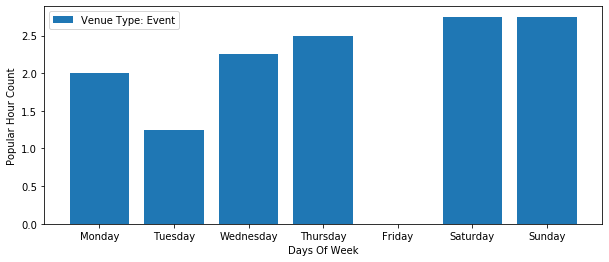

In [31]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
Y = Y_pred[0]

plt.bar(X,Y, label = "Venue Type: "+str(ALLcategories.name[index]))

plt.xlabel('Days Of Week')
plt.ylabel('Popular Hour Count')
plt.rcParams["figure.figsize"] = (10,4)
plt.legend(loc='upper left')

In [ ]:
#Dev Notes :  The user needs to input at the beginning the kind of venue it wants to open
#Then the script gets simillar venues on a given radius
#Cleans the data, creates a dataset with name category lat long monday.. sunday
#uses that to train the KNN
# predicts the number of hours a venues opened int city_coordinates with the selected category type would have in any given day

#Caution with request limits!!!!!! when changing venue type